<a href="https://www.kaggle.com/code/septianbagussantoso/tugas-machine-learning-ds-wpv2-kelompok-8?scriptVersionId=235269451" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tugas-machine-learning-ds-wpv2/phishing.txt
/kaggle/input/tugas-machine-learning-ds-wpv2/phishing.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2025-04-21 15:50:35.011681: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745250635.241059      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745250635.308990      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
#LOAD DATA
df = pd.read_csv("/kaggle/input/tugas-machine-learning-ds-wpv2/phishing.csv")
X = df.drop(columns=["Index", "class"], errors='ignore')
y = df["class"].replace(-1, 0)

In [4]:
#Pisahkan fitur (X) dan label (y)
X = df.drop(columns=["Index", "class"], errors='ignore')
y = df["class"].replace(-1, 0)

In [5]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#INISIALISASI MODEL SKLEARN
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(),
    "Naïve Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extreme Gradient Boosting": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

In [8]:
#EVALUASI MODEL SKLEARN
results = []
for name, model in models.items():
    print(f"Training {name}...")
    if name in ["Neural Network", "Support Vector Machine", "Stochastic Gradient Descent", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average='binary') * 100
    recall = recall_score(y_test, y_pred, average='binary') * 100
    f1 = f1_score(y_test, y_pred, average='binary') * 100

    results.append({
        "Model": name,
        "Accuracy (%)": accuracy,
        "Precision (%)": precision,
        "Recall (%)": recall,
        "F1-Score (%)": f1
    })

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Support Vector Machine...
Training Naïve Bayes...
Training K-Nearest Neighbors...
Training AdaBoost...
Training Extreme Gradient Boosting...
Training Linear Discriminant Analysis...
Training Stochastic Gradient Descent...
Training Neural Network...


In [9]:
#MODEL CNN FULL FITUR
def create_cnn_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [10]:
# Train CNN dengan semua fitur
cnn_model = create_cnn_model(X_train_scaled.shape[1])
history = cnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
                        validation_data=(X_test_scaled, y_test), verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-21 15:51:04.658041: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
# Prediksi CNN
y_pred_cnn = (cnn_model.predict(X_test_scaled) > 0.5).astype(int)


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [12]:
# Hitung metrik CNN
accuracy_cnn = accuracy_score(y_test, y_pred_cnn) * 100
precision_cnn = precision_score(y_test, y_pred_cnn, average='binary') * 100
recall_cnn = recall_score(y_test, y_pred_cnn, average='binary') * 100
f1_cnn = f1_score(y_test, y_pred_cnn, average='binary') * 100

results.append({
    "Model": "CNN (All features)",
    "Accuracy (%)": accuracy_cnn,
    "Precision (%)": precision_cnn,
    "Recall (%)": recall_cnn,
    "F1-Score (%)": f1_cnn
})

In [13]:
#BUAT DATAFRAME HASIL EVALUASI
results_df = pd.DataFrame(results)

/tmp/ipykernel_13/3379157493.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


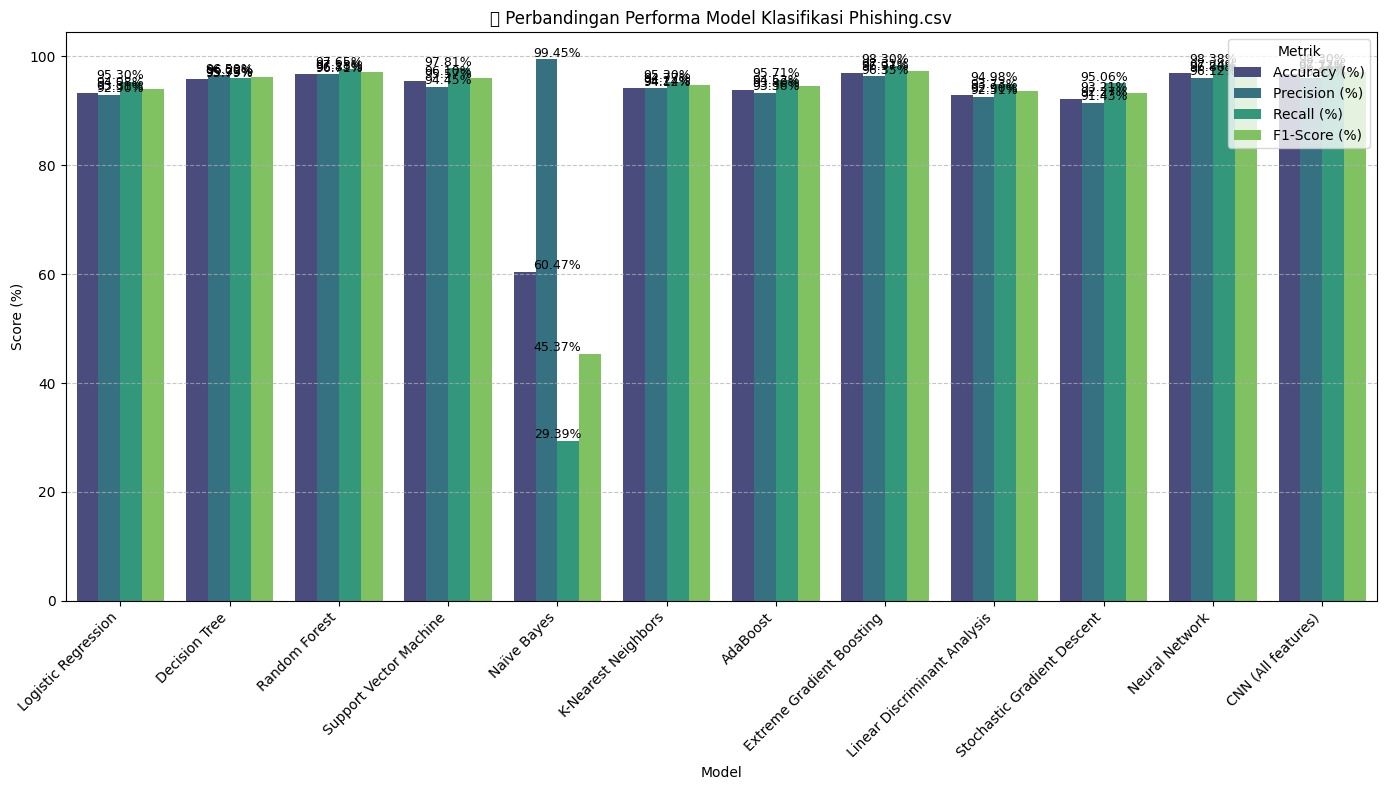

In [14]:
#VISUALISASI HASIL KESELURUHAN
plt.figure(figsize=(14, 8))
results_melted = results_df.melt(id_vars=["Model"], var_name="Metric", value_name="Value")
sns.barplot(data=results_melted, x="Model", y="Value", hue="Metric", palette="viridis")
for index, row in results_melted.iterrows():
    plt.text(index % len(results_df), row["Value"] + 0.5, f"{row['Value']:.2f}%", ha='center', fontsize=9)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Score (%)")
plt.title("📊 Perbandingan Performa Model Klasifikasi Phishing.csv")
plt.legend(title="Metrik")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
#EKSPERIMEN CNN DENGAN BEBERAPA FITUR
feature_counts = [30, 24, 17, 10]
accuracy_scores, loss_scores = [], []

for k in feature_counts:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)

    cnn_model_k = create_cnn_model(X_train_selected.shape[1])
    history = cnn_model_k.fit(X_train_selected, y_train, epochs=50, batch_size=32,
                              validation_data=(X_test_selected, y_test), verbose=0)

    accuracy_scores.append(history.history["val_accuracy"])
    loss_scores.append(history.history["val_loss"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

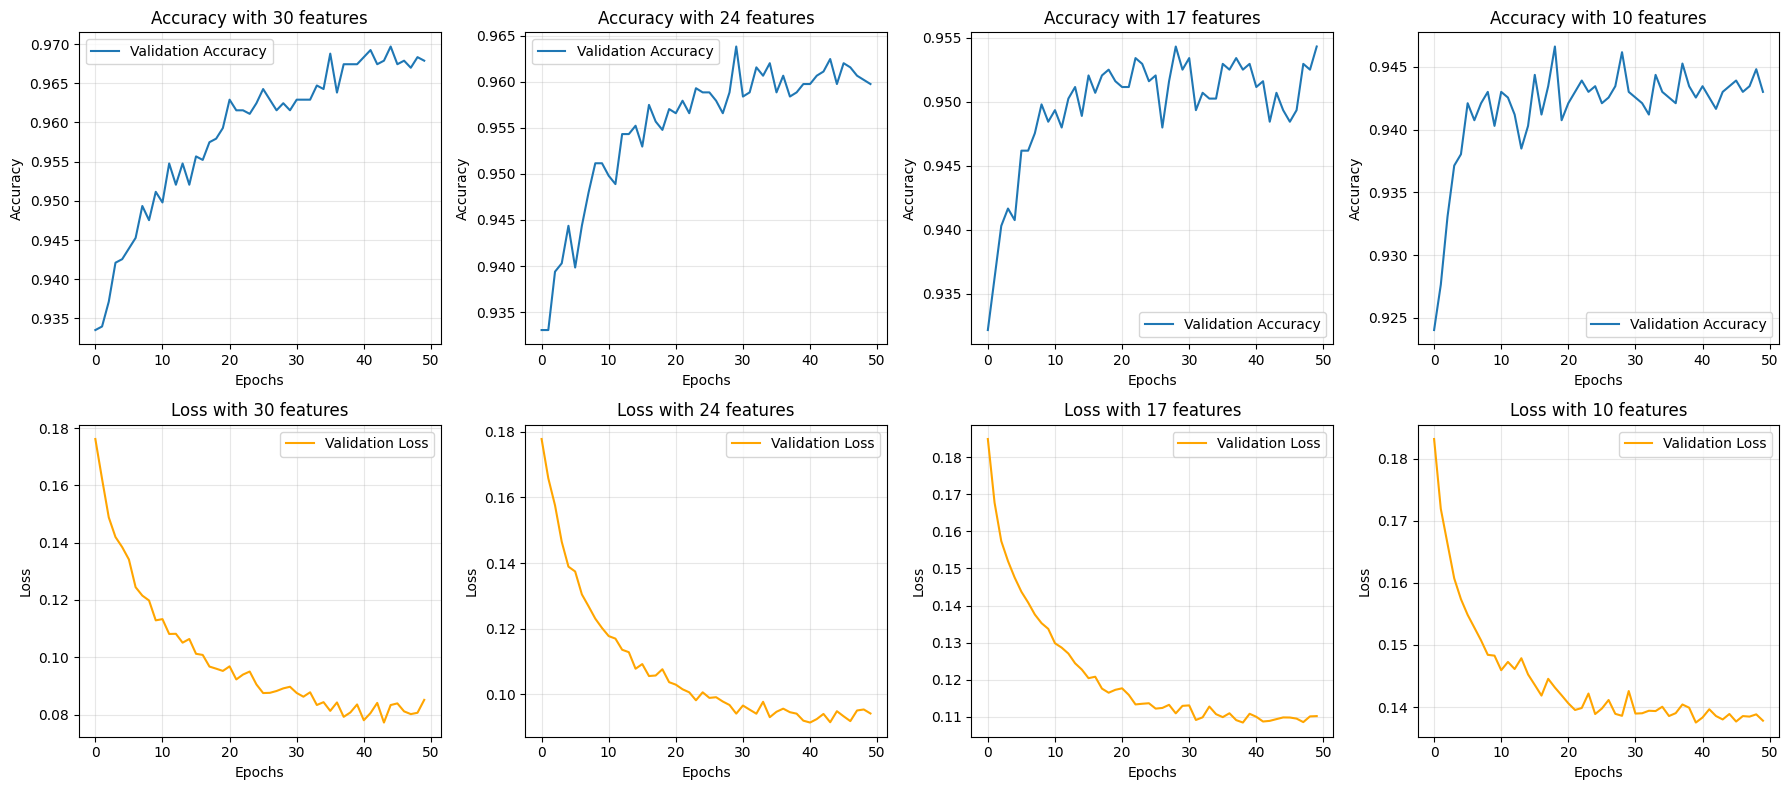

In [16]:
#VISUALISASI ACCURACY & LOSS CNN DENGAN BERBAGAI FITUR
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
feature_labels = ["30 features", "24 features", "17 features", "10 features"]

for i, ax in enumerate(axes[0]):
    ax.plot(accuracy_scores[i], label="Validation Accuracy")
    ax.set_title(f"Accuracy with {feature_labels[i]}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Accuracy")
    ax.legend()
    ax.grid(alpha=0.3)

for i, ax in enumerate(axes[1]):
    ax.plot(loss_scores[i], label="Validation Loss", color="orange")
    ax.set_title(f"Loss with {feature_labels[i]}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()